In [ ]:
# This Code includes Dataset loading and exploration.
#Preprocessing: Standardization of features.
#Regularized Ridge Regression with 5-fold cross-validation and grid search.
#Regularized Logistic Regression with similar techniques.
#Evaluation metrics like MSE for Ridge and accuracy for Logistic Regression.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Part 1: Dataset Selection and Exploration

# Load datasets
diabetes_data = load_diabetes()
diabetes_X, diabetes_y = diabetes_data.data, diabetes_data.target

breast_cancer_data = load_breast_cancer()
breast_cancer_X, breast_cancer_y = breast_cancer_data.data, breast_cancer_data.target

In [5]:
# Preprocessing: Standardize the datasets
scaler = StandardScaler()
diabetes_X = scaler.fit_transform(diabetes_X)
breast_cancer_X = scaler.fit_transform(breast_cancer_X)

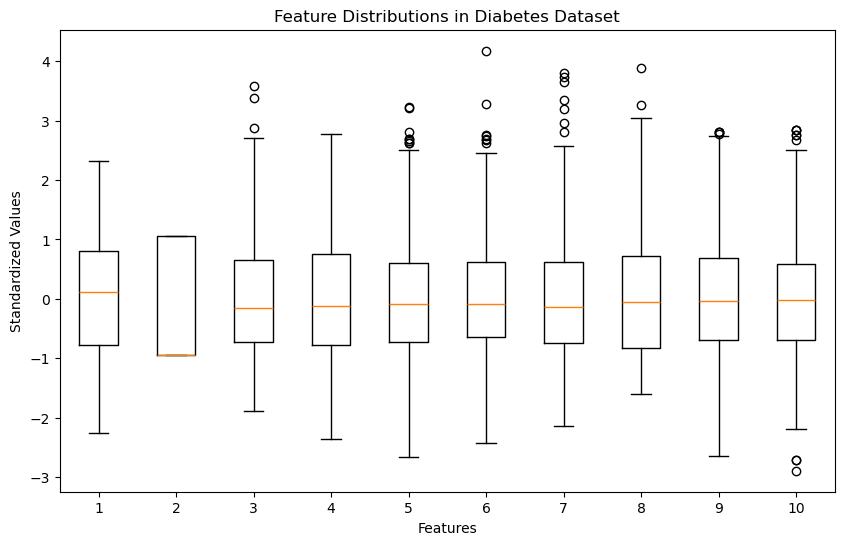

In [7]:
# Visualization: Feature distributions for diabetes dataset
plt.figure(figsize=(10, 6))
plt.boxplot(diabetes_X)
plt.title("Feature Distributions in Diabetes Dataset")
plt.xlabel("Features")
plt.ylabel("Standardized Values")
plt.show()

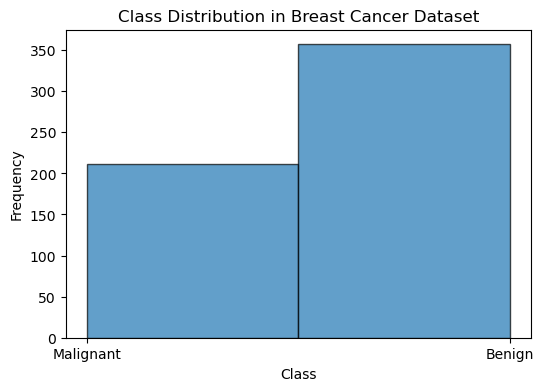

In [9]:
# Visualization: Target distribution for breast cancer dataset
plt.figure(figsize=(6, 4))
plt.hist(breast_cancer_y, bins=2, edgecolor='k', alpha=0.7)
plt.title("Class Distribution in Breast Cancer Dataset")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()

In [11]:
# Part 2: Regularized Linear Regression with Libraries

# Split diabetes dataset
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)

# Ridge Regression with Grid Search
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}  # Regularization strength
ridge_grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [13]:
# Optimal alpha
best_alpha_ridge = ridge_grid.best_params_['alpha']
print(f"Optimal alpha for Ridge Regression: {best_alpha_ridge}")

# Evaluate on test set
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train, y_train)

y_pred_ridge = ridge_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error on Test Set: {mse}")

Optimal alpha for Ridge Regression: 10
Mean Squared Error on Test Set: 2875.6675849978706


In [15]:
# Part 2: Regularized Logistic Regression with Libraries

# Split breast cancer dataset
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_X, breast_cancer_y, test_size=0.2, random_state=42)

# Logistic Regression with Grid Search
logreg = LogisticRegression(solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength (inverse of alpha)
logreg_grid = GridSearchCV(logreg, param_grid, scoring='accuracy', cv=5)
logreg_grid.fit(X_train, y_train)

# Optimal C
best_C_logreg = logreg_grid.best_params_['C']
print(f"Optimal C for Logistic Regression: {best_C_logreg}")

# Evaluate on test set
logreg_best = LogisticRegression(solver='liblinear', C=best_C_logreg)
logreg_best.fit(X_train, y_train)

y_pred_logreg = logreg_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy on Test Set: {accuracy}")

# Summary of results
print("\nSummary:")
print(f"Ridge Regression - Best Alpha: {best_alpha_ridge}, Test MSE: {mse}")
print(f"Logistic Regression - Best C: {best_C_logreg}, Test Accuracy: {accuracy}")

Optimal C for Logistic Regression: 0.1
Accuracy on Test Set: 0.9912280701754386

Summary:
Ridge Regression - Best Alpha: 10, Test MSE: 2875.6675849978706
Logistic Regression - Best C: 0.1, Test Accuracy: 0.9912280701754386
